<h1> L1 Lasso regularization feature selection method</h1>

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [20]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [21]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [22]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from collections import Counter
words_to_count = (word for word in tfidf_tokens if word[:1].isupper())
c = Counter(words_to_count)
print(c.most_common(10))

In [24]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
all_c = np.arange(0.5, 5, 0.2)
all_selectors = []

for c in all_c:
    # print(f"> Fitting - ")
    lsvc = LinearSVC(C=c, penalty="l1", dual=False).fit(X_train, y_train)
    selector = SelectFromModel(lsvc, prefit=True)
    all_selectors.append(selector)

<h3> MultinomialNB </h3>

> Training and evaluating MultinomialNB model for 1 selector with 143 features
> Training and evaluating MultinomialNB model for 2 selector with 235 features
> Training and evaluating MultinomialNB model for 3 selector with 350 features
> Training and evaluating MultinomialNB model for 4 selector with 434 features
> Training and evaluating MultinomialNB model for 5 selector with 539 features
> Training and evaluating MultinomialNB model for 6 selector with 621 features
> Training and evaluating MultinomialNB model for 7 selector with 733 features
> Training and evaluating MultinomialNB model for 8 selector with 809 features
> Training and evaluating MultinomialNB model for 9 selector with 869 features
> Training and evaluating MultinomialNB model for 10 selector with 913 features
> Training and evaluating MultinomialNB model for 11 selector with 946 features
> Training and evaluating MultinomialNB model for 12 selector with 1021 features
> Training and evaluating MultinomialNB model fo

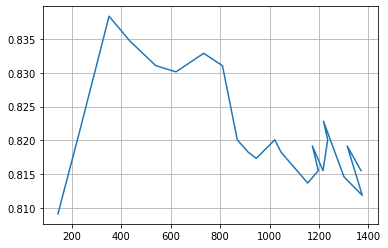

In [26]:
all_scores_MultinomialNB = []
score_best_MultinomialNB = 0
all_features_number = []

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating MultinomialNB model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_MultinomialNB.append(score)

    if score > score_best_MultinomialNB:
        score_best_MultinomialNB = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_MultinomialNB = model
        best_features_MultinomialNB = sel


print(f"Best k is {k_best} with score {score_best_MultinomialNB}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_MultinomialNB)
plt.grid()

<h3> SVC </h3>

> Training and evaluating SVC model for 1 selector with 143 features
> Training and evaluating SVC model for 2 selector with 235 features
> Training and evaluating SVC model for 3 selector with 350 features
> Training and evaluating SVC model for 4 selector with 434 features
> Training and evaluating SVC model for 5 selector with 539 features
> Training and evaluating SVC model for 6 selector with 621 features
> Training and evaluating SVC model for 7 selector with 733 features
> Training and evaluating SVC model for 8 selector with 809 features
> Training and evaluating SVC model for 9 selector with 869 features
> Training and evaluating SVC model for 10 selector with 913 features
> Training and evaluating SVC model for 11 selector with 946 features
> Training and evaluating SVC model for 12 selector with 1021 features
> Training and evaluating SVC model for 13 selector with 1046 features
> Training and evaluating SVC model for 14 selector with 1154 features
> Training and evaluating 

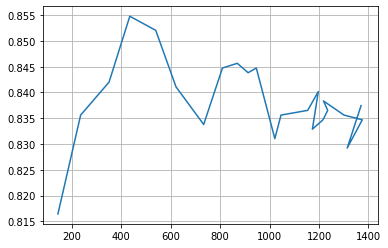

In [27]:
all_scores_SVC = []
score_best_SVC = 0
all_features_number = []

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating SVC model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])
    
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001]}

    model = GridSearchCV(SVC(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_SVC.append(score)

    if score > score_best_SVC:
        score_best_SVC = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_SVC = model
        best_features_SVC = sel


print(f"Best k is {k_best} with score {score_best_SVC}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_SVC)
plt.grid()

<h3> LogisticRegression </h3>

> Training and evaluating LogisticRegression model for 1 selector with 143 features
> Training and evaluating LogisticRegression model for 2 selector with 235 features
> Training and evaluating LogisticRegression model for 3 selector with 350 features
> Training and evaluating LogisticRegression model for 4 selector with 434 features
> Training and evaluating LogisticRegression model for 5 selector with 539 features
> Training and evaluating LogisticRegression model for 6 selector with 621 features
> Training and evaluating LogisticRegression model for 7 selector with 733 features
> Training and evaluating LogisticRegression model for 8 selector with 809 features
> Training and evaluating LogisticRegression model for 9 selector with 869 features
> Training and evaluating LogisticRegression model for 10 selector with 913 features
> Training and evaluating LogisticRegression model for 11 selector with 946 features
> Training and evaluating LogisticRegression model for 12 selector with 10

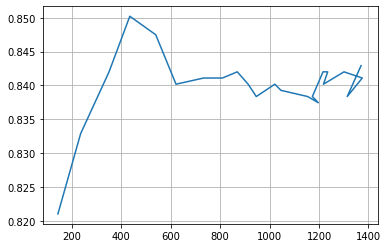

In [28]:
all_scores_LogisticRegression = []
score_best_LogisticRegression = 0
all_features_number = []

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet']}

    model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_LogisticRegression.append(score)

    if score > score_best_LogisticRegression:
        score_best_LogisticRegression = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_LogisticRegression = model
        best_features_LogisticRegression = sel


print(f"Best k is {k_best} with score {score_best_LogisticRegression}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_LogisticRegression)
plt.grid()

<h3>RandomForestClassifier</h3>

> Training and evaluating LogisticRegression model for 1 selector with 143 features
> Training and evaluating LogisticRegression model for 2 selector with 235 features
> Training and evaluating LogisticRegression model for 3 selector with 350 features
> Training and evaluating LogisticRegression model for 4 selector with 434 features
> Training and evaluating LogisticRegression model for 5 selector with 539 features
> Training and evaluating LogisticRegression model for 6 selector with 621 features
> Training and evaluating LogisticRegression model for 7 selector with 733 features
> Training and evaluating LogisticRegression model for 8 selector with 809 features
> Training and evaluating LogisticRegression model for 9 selector with 869 features
> Training and evaluating LogisticRegression model for 10 selector with 913 features
> Training and evaluating LogisticRegression model for 11 selector with 946 features
> Training and evaluating LogisticRegression model for 12 selector with 10

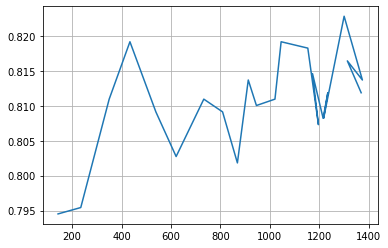

In [29]:
all_scores_RandomForestClassifier = []
score_best_RandomForestClassifier = 0
all_features_number = []

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])

    param_grid = {'n_estimators': [100, 200, 400, 600]}

    model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    y_pred = model.predict(X_test_new)
    score = accuracy_score(y_test,y_pred)
    all_scores_RandomForestClassifier.append(score)

    if score > score_best_RandomForestClassifier:
        score_best_RandomForestClassifier = score
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_RandomForestClassifier = model
        best_features_RandomForestClassifier = sel


print(f"Best k is {k_best} with score {score_best_RandomForestClassifier}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_RandomForestClassifier)
plt.grid()

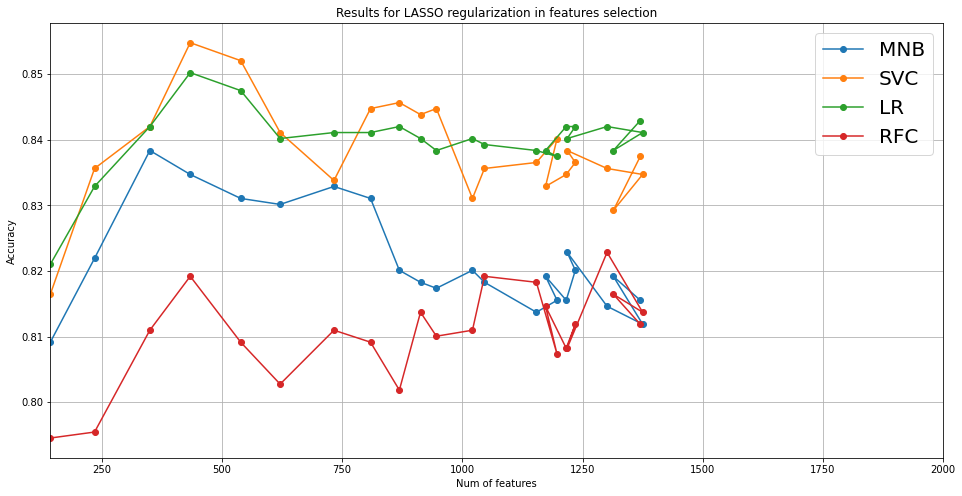

In [37]:
plt.figure(figsize=(16, 8))

plt.plot(all_features_number, all_scores_MultinomialNB, '-o')
plt.plot(all_features_number, all_scores_SVC, '-o')
plt.plot(all_features_number, all_scores_LogisticRegression, '-o')
plt.plot(all_features_number, all_scores_RandomForestClassifier, '-o')

plt.xlim(143, 2000)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20})
plt.xlabel("Num of features")
plt.ylabel("Accuracy")
plt.title("Results for LASSO regularization in features selection")

# point1 = [0, 0.83]
# point2 = [2500, 0.83]
# x_values = [point1[0], point2[0]]
# y_values = [point1[1], point2[1]]

# plt.plot(x_values, y_values, 'k--')

plt.grid()